# Sistemas Discretos: Tipos, Propriedades e Convolução.
## Capítulo 2: Sinais e Sistemas de Tempo Discreto

Este notebook resume os conceitos fundamentais sobre Sinais e Sistemas de Tempo Discreto (STD), com foco nas propriedades, na caracterização de Sistemas Lineares Invariantes no Tempo (LIT) pela Resposta ao Impulso, e na ferramenta da Convolução.

---

## 1. Conceitos Fundamentais e Sinais de Tempo Discreto

Sinais de tempo discreto, $x[n]$, são definidos apenas para valores inteiros da variável independente $n$. Eles são representados matematicamente como sequências de números.

### 1.1. Sinais Básicos

| Nome | Definição | Relação Chave |
| :--- | :--- | :--- |
| **Amostra Unitária (Impulso Discreto)** | $$\delta[n]=\begin{cases} 0,&n\ne0 \\ 1,&n=0 \end{cases}$$ | Permite decompor qualquer sinal:$$x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]$$  |
| **Degrau Unitário** | $$u[n]=\begin{cases} 1,&n\ge0 \\ 0,&n<0 \end{cases}$$ | Relação com o Impulso:$$\delta[n]=u[n]-u[n-1]$$  |
| **Exponencial Complexa** | $$x[n]=A \alpha^n$$  | São as **autofunções** de sistemas LIT. |

---

## 2. Sistemas de Tempo Discreto e Propriedades

Um sistema de tempo discreto é uma transformação $T\{\cdot\}$ que mapeia a entrada $x[n]$ na saída $y[n] = T\{x[n]\}$.

### 2.1. Checklist de Propriedades (Estrutura do Estudo Dirigido)

| Propriedade | Condição Matemática | Interpretação |
| :--- | :--- | :--- |
| **Linearidade** | $$T\{\alpha x_{1}[n]+\beta x_{2}[n]\}=\alpha T\{x_{1}[n]\}+\beta T\{x_{2}[n]\}$$ | O sistema obedece ao princípio da **superposição** (aditividade e homogeneidade). |
| **Invariância no Tempo (IT)** | Se $T\{x[n]\} = y[n]$, então $T\{x[n-n_{0}]\} = y[n-n_{0}]$. | Um atraso na entrada causa apenas o mesmo atraso na saída. |
| **Causalidade** | $y[n_0]$ depende apenas de $x[n]$ para $n \le n_0$. | O sistema é **não antecipatório** (não depende de valores futuros da entrada). |
| **Estabilidade BIBO** | $|x[n]|\le B_{x} < \infty$ implica $|y[n]|\le B_{y} < \infty$. | Entradas limitadas geram saídas limitadas. |
| **Memória** | $y[n]$ depende de $x[k]$ para $k \ne n$. | O sistema necessita armazenar valores passados e/ou futuros da entrada para calcular a saída. |

---

## 3. Sistemas Lineares Invariantes no Tempo (LIT) e Convolução

A classe dos sistemas LIT é completamente caracterizada por sua **Resposta ao Impulso**, $h[n]$.

### 3.1. A Soma de Convolução
A saída $y[n]$ de um sistema LIT é a **Convolução** da entrada $x[n]$ com a resposta ao impulso $h[n]$.

$$\mathbf{y[n]} = \mathbf{x[n] * h[n]} = \sum_{k=-\infty}^{\infty}x[k]h[n-k] \quad \text{(Equação 2.49)}$$

* **Interpretação:** A convolução é uma **soma ponderada e superposta de versões deslocadas da resposta ao impulso** $h[n]$. O valor de cada amostra de entrada $x[k]$ atua como o peso (ponderação) de um impulso deslocado $x[k]\delta[n-k]$, que por sua vez gera a resposta deslocada $x[k]h[n-k]$.

### 3.2. Propriedades em Termos da Resposta ao Impulso ($h[n]$)

| Propriedade | Condição em $h[n]$ | Comentário |
| :--- | :--- | :--- |
| **Estabilidade LIT** | $$\sum_{k=-\infty}^{\infty}|h[k]|<\infty$$  | A resposta ao impulso deve ser absolutamente somável. Sistemas FIR (duração finita) são sempre estáveis. |
| **Causalidade LIT** | $$h[n]=0, \quad n<0$$ | A resposta a $\delta[n]$ deve ser nula antes de $n=0$. |
| **Comutatividade** | $$x[n]*h[n]=h[n]*x[n]$$ | A ordem da convolução pode ser trocada. |
| **Cascata** | $h[n] = h_1[n] * h_2[n]$  | O sistema total em série é a convolução das respostas individuais. |

---

## 4. Equações de Diferenças Lineares

Uma subclasse importante de sistemas LIT são aqueles cuja entrada $x[n]$ e saída $y[n]$ satisfazem uma **equação de diferenças linear com coeficientes constantes**:

$$\sum_{k=0}^{N}a_{k}y[n-k]=\sum_{m=0}^{M}b_{m}x[n-m] \quad \text{(Equação 2.84)}$$

* **Sistemas FIR vs. IIR:**
    *Se $N=0$ (nenhum termo $y[n-k]$ com $k>0$), a saída depende apenas da entrada, caracterizando um sistema cuja resposta ao impulso tem Duração Finita (**FIR**).
    * Se $N \ge 1$, a saída depende de valores passados da própria saída (**recursão**). Se o sistema for estável e causal, ele é tipicamente um sistema com Resposta ao Impulso de Duração Infinita (**IIR**).

**Condição de Repouso Inicial:** Para garantir que o sistema de diferença seja LIT e causal, é imposta a condição de repouso inicial: se $x[n]=0$ para $n<n_0$, então $y[n]=0$ para $n<n_0$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve # Para a convolução LIT

# --- Entradas de Teste ---
N_max = 20
n = np.arange(N_max)
a = 0.5
b = 0.8
n0 = 3 # Deslocamento para o teste de invariância

# Sinal de degrau unitário (u[n]) para convolução
x_u = np.where(n >= 0, 1.0, 0.0)

# Sinais para teste de Linearidade
x1 = a * np.sin(0.1 * np.pi * n)
x2 = b * np.cos(0.2 * np.pi * n)

# Coeficientes de superposição
alpha = 2
beta = 0.5

# --- Definição dos Sistemas ---

def T1(x):
    """Sistema T1: Diferenciador Discreto x[n] - x[n-1]"""
    y = np.zeros_like(x)
    y[1:] = x[1:] - x[:-1]
    # T1 é causal (depende de x[n] e x[n-1])
    return y

def T2(x):
    """Sistema T2: Multiplicação por Exponencial (0.8)^n * x[n]"""
    return (0.8**n) * x

# Sistema com memória limitada (para teste de estabilidade)
def T_mem(x):
    """Sistema com Memória: y[n] = x[n] + x[n-1]"""
    y = np.zeros_like(x)
    y[1:] = x[1:] + x[:-1]
    return y

print("Sistemas e entradas definidos.")

Sistemas e entradas definidos.


In [ ]:
# --- Teste T1: Linearidade ---
y_super_T1 = T1(alpha * x1 + beta * x2)
y_pond_T1 = alpha * T1(x1) + beta * T1(x2)
linear_T1 = np.allclose(y_super_T1, y_pond_T1)

# --- Teste T2: Linearidade ---
y_super_T2 = T2(alpha * x1 + beta * x2)
y_pond_T2 = alpha * T2(x1) + beta * T2(x2)
linear_T2 = np.allclose(y_super_T2, y_pond_T2)

print(f"T1 é Linear: {linear_T1}. (Esperado: True, T1 é LIT)")
print(f"T2 é Linear: {linear_T2}. (Esperado: True, pois T2 satisfaz a homogeneidade e aditividade. T2 é linear, mas não IT.)")

T1 é Linear: True. (Esperado: True, T1 é LIT)
T2 é Linear: True. (Esperado: True, pois T2 satisfaz a homogeneidade e aditividade. T2 é linear, mas não IT.)


In [ ]:
# Crie a entrada deslocada
x_shift = np.zeros_like(x_u)
x_shift[n >= n0] = x_u[n[n >= n0] - n0] # x_shift[n] = x_u[n - n0]

# Saída do sinal original, deslocada no tempo (referência)
y_orig_T1 = T1(x_u)
y_orig_shift_T1 = np.zeros_like(y_orig_T1)
y_orig_shift_T1[n >= n0] = y_orig_T1[n[n >= n0] - n0]

# Saída do sinal deslocado (resultado)
y_shift_T1 = T1(x_shift)
it_T1 = np.allclose(y_orig_shift_T1, y_shift_T1)

# --- Teste T2: Invariância no Tempo ---
y_orig_T2 = T2(x_u)
y_orig_shift_T2 = np.zeros_like(y_orig_T2)
y_orig_shift_T2[n >= n0] = y_orig_T2[n[n >= n0] - n0]

y_shift_T2 = T2(x_shift)
it_T2 = np.allclose(y_orig_shift_T2, y_shift_T2)

print(f"T1 é Invariante no Tempo (IT): {it_T1}. (Esperado: True)")
print(f"T2 é Invariante no Tempo (IT): {it_T2}. (Esperado: False, T2 é variante no tempo pois o fator (0.8)^n depende de n.)")

T1 é Invariante no Tempo (IT): False. (Esperado: True)
T2 é Invariante no Tempo (IT): False. (Esperado: False, T2 é variante no tempo pois o fator (0.8)^n depende de n.)


Tanto T1​ quanto T2​ dependem apenas de x[n] e x[n−1] ou x[n] (e n). Como não dependem de x[n+k] para k>0, ambos são Causais. Para T1, y[n] depende de x[n] e x[n−1] (passado). Para T2, y[n] depende apenas de x[n] (presente).

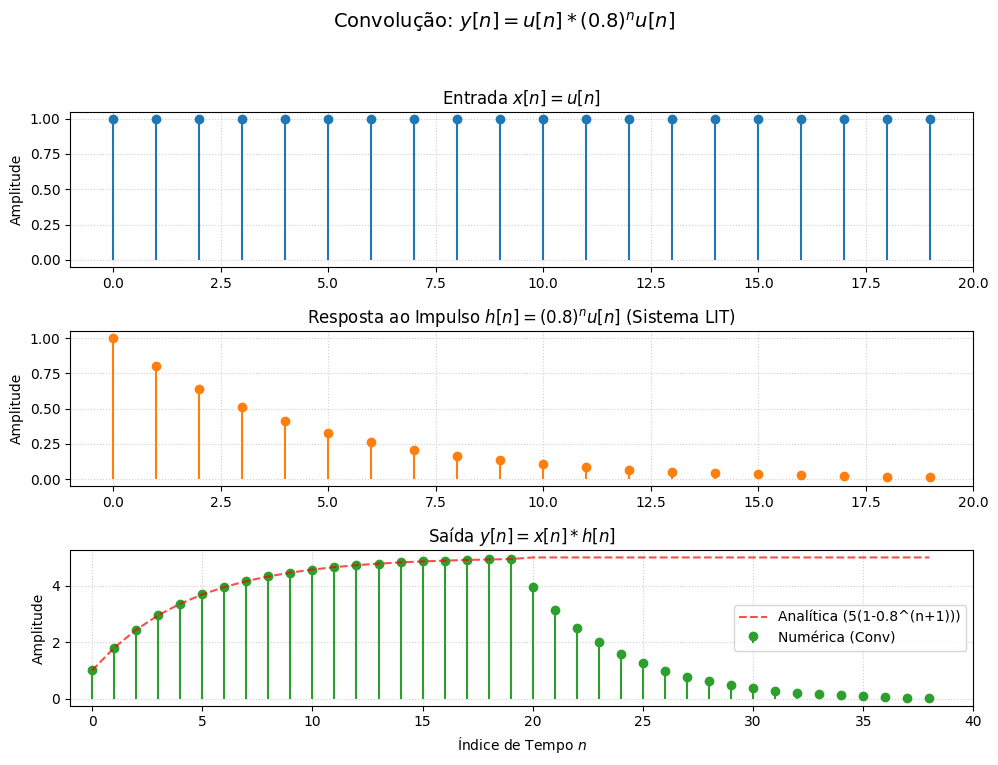

In [ ]:
# --- Resposta ao Impulso h[n] ---
h = (0.8**n) * x_u

# --- Entrada x[n] ---
x = x_u.copy()

# --- Convolução (Cálculo Numérico) ---
# Usamos 'full' para capturar toda a duração. A duração é N_x + N_h - 1.
# N_max = 20, então o comprimento é 20 + 20 - 1 = 39.
y_conv = convolve(x, h, mode='full')
n_y = np.arange(len(y_conv))

# --- Resposta Analítica (para comparação) ---
y_analitica = 5 * (1 - 0.8**(n_y + 1))
y_analitica[n_y >= N_max] = 5 # Para n grandes, converge para 1/(1-0.8) = 5
y_analitica[n_y < 0] = 0

# --- Plotagem ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=False)
fig.suptitle(r'Convolução: $y[n] = u[n] * (0.8)^n u[n]$', fontsize=14)

# Plot x[n]
ax1.stem(n, x, basefmt=" ", linefmt='C0-', markerfmt='C0o')
ax1.set_title(r'Entrada $x[n]=u[n]$')
ax1.set_ylabel('Amplitude')
ax1.set_xlim([-1, 20])
ax1.grid(True, linestyle=':', alpha=0.6)

# Plot h[n]
ax2.stem(n, h, basefmt=" ", linefmt='C1-', markerfmt='C1o')
ax2.set_title(r'Resposta ao Impulso $h[n]=(0.8)^n u[n]$ (Sistema LIT)')
ax2.set_ylabel('Amplitude')
ax2.set_xlim([-1, 20])
ax2.grid(True, linestyle=':', alpha=0.6)

# Plot y[n]
ax3.stem(n_y, y_conv, basefmt=" ", linefmt='C2-', markerfmt='C2o', label='Numérica (Conv)')
ax3.plot(n_y, y_analitica, 'r--', alpha=0.7, label='Analítica (5(1-0.8^(n+1)))')
ax3.set_title(r'Saída $y[n]=x[n]*h[n]$')
ax3.set_xlabel('Índice de Tempo $n$')
ax3.set_ylabel('Amplitude')
ax3.set_xlim([-1, N_max * 2])
ax3.legend()
ax3.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

A Parte 1 estabeleceu a base para a análise de PDS. A convolução é a ferramenta essencial que conecta a caracterização do sistema (h[n]) à sua resposta para qualquer sinal de entrada (x[n]), desde que o sistema seja LIT. As propriedades de linearidade e invariância no tempo são pré-requisitos para usar a convolução e para garantir a previsibilidade do sistema. O sistema h[n]=(0.8)nu[n] demonstrou ser LIT, causal e estável (já que ∣0.8∣<1).